# Time Series Prediction using LSTM

### Download Data
Link: https://datamarket.com/data/set/2324/daily-minimum-temperatures-in-melbourne-australia-1981-1990#!ds=2324&display=line

#### Description
Daily minimum temperatures in Melbourne, Australia, 1981-1990

Units: Degrees Celcius

#### Steps before loading
- Rename the column name with temprature values to "Temprature"
- In the last, there is one extra row in the data, remove it by opening the file and save it again.
- There are some values in Temprature column which have a "?" before them, they will give error, remove "?" before them and save the file
- If you don't want to do these steps, just load the data file given by Great Learning.

In [0]:
## The File Provided is already Clean as checked in the below steps

# New Section

In [2]:
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import GRU, Dense
from keras.layers import LSTM
from keras  import callbacks
from keras import optimizers
import pandas as pd 
import tensorflow as tf
import numpy as np

Using TensorFlow backend.


#### Mount google drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Change your present working directory

In [0]:
import os
os.chdir('/content/drive/My Drive/Labs/Residency 9/Internal Lab/')

### Load your data file

In [0]:
df= pd.read_csv("daily-minimum-temperatures-in-me.csv")

In [6]:
df.columns

Index(['Date', 'Temperature'], dtype='object')

#### Plot data

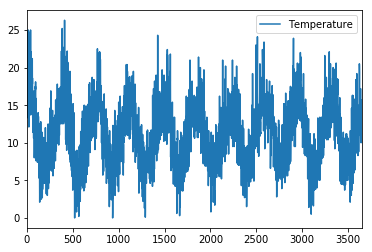

In [7]:
df.plot()

#### Descibe your dataframe

In [8]:
df.describe()

,Temperature
count,3650.000000
mean,11.177753
std,4.071837
min,0.000000
25%,8.300000
50%,11.000000
75%,14.000000
max,26.300000


#### Check for null values

In [9]:
df.isnull().sum()

Date           0
Temperature    0
dtype: int64

#### Drop null values

In [0]:
df.dropna(inplace=True)

In [11]:
df.isnull().sum()

Date           0
Temperature    0
dtype: int64

#### Get the representation of the distribution of data in the form of histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0ea1542ac8>]],
      dtype=object)

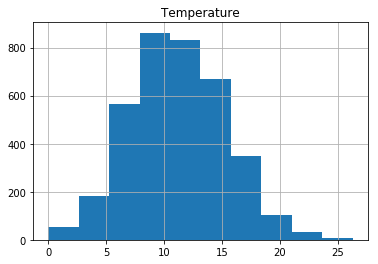

In [12]:
df.hist(bins=10)

#### Check the maximum and minimum values

In [13]:
df.max()

Date           1990-12-31
Temperature          26.3
dtype: object

In [14]:
df.min()

Date           1981-01-01
Temperature             0
dtype: object

### Normalize the data

In [15]:
df.shape[0]

3650

In [0]:
df['Temperature']=df['Temperature'].astype('float32')

In [0]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(df['Temperature'].values.reshape(-1,1))# -1 determines that df has a shape of 3650, 1

#### Check the maximum and minimum values of scaled data

In [18]:
print('Min', np.min(scaled))
print('Max', np.max(scaled))

Min 0.0
Max 1.0


#### Look into some of the scaled values

In [19]:
print(scaled[:10])

[[0.7870723 ]
 [0.6806084 ]
 [0.7148289 ]
 [0.5551331 ]
 [0.6007605 ]
 [0.6007605 ]
 [0.6007605 ]
 [0.661597  ]
 [0.82889736]
 [0.7604563 ]]


### Split data into Training and Testing

In [0]:
#Create the model
train_size = int(len(scaled) * 0.70)
test_size = len(scaled - train_size)
train, test = scaled[0:train_size, :], scaled[train_size: len(scaled), :]


#### Print train and test size

In [21]:
print('train: {}\ntest: {}'.format(len(train), len(test)))

train: 2555
test: 1095


## Create the sequential data
Map the temprature at a particular time t to the temprature at time t+n, where n is any number you define.

For example: to map tempratures of consecutive days, use t+1, i.e. loop_back = 1

#### Define your function to create dataset

In [0]:
def create_dataset(dataset, look_back=1):
    print(len(dataset), look_back)
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        print(i)
        print('X {} to {}'.format(i, i+look_back))
        print(a)
        print('Y {}'.format(i + look_back))
        print(dataset[i + look_back, 0])
        dataset[i + look_back, 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

#### Use function to get training and test set

In [23]:
look_back = 1
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)

2555 1
0
X 0 to 1
[0.7870723]
Y 1
0.6806084
1
X 1 to 2
[0.6806084]
Y 2
0.7148289
2
X 2 to 3
[0.7148289]
Y 3
0.5551331
3
X 3 to 4
[0.5551331]
Y 4
0.6007605
4
X 4 to 5
[0.6007605]
Y 5
0.6007605
5
X 5 to 6
[0.6007605]
Y 6
0.6007605
6
X 6 to 7
[0.6007605]
Y 7
0.661597
7
X 7 to 8
[0.661597]
Y 8
0.82889736
8
X 8 to 9
[0.82889736]
Y 9
0.7604563
9
X 9 to 10
[0.7604563]
Y 10
0.61596966
10
X 10 to 11
[0.61596966]
Y 11
0.50570345
11
X 11 to 12
[0.50570345]
Y 12
0.63498104
12
X 12 to 13
[0.63498104]
Y 13
0.8174906
13
X 13 to 14
[0.8174906]
Y 14
0.9505704
14
X 14 to 15
[0.9505704]
Y 15
0.7870723
15
X 15 to 16
[0.7870723]
Y 16
0.78327
16
X 16 to 17
[0.78327]
Y 17
0.9429658
17
X 17 to 18
[0.9429658]
Y 18
0.67300385
18
X 18 to 19
[0.67300385]
Y 19
0.5893537
19
X 19 to 20
[0.5893537]
Y 20
0.6920153
20
X 20 to 21
[0.6920153]
Y 21
0.4600761
21
X 21 to 22
[0.4600761]
Y 22
0.54752856
22
X 22 to 23
[0.54752856]
Y 23
0.60836506
23
X 23 to 24
[0.60836506]
Y 24
0.62737644
24
X 24 to 25
[0.62737644]
Y 25
0.7110

#### Transform the prepared train and test input data into the expected structure using numpy.reshape()

In [24]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_train.shape)
print(X_test.shape)

(2553, 1, 1)
(1093, 1, 1)


## Define Model

### Define sequntial model, add LSTM layer and compile the model

In [25]:
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True)) #stateful = True means hidden state in maintained
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam') #

W0707 09:44:27.840695 139702216759168 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0707 09:44:27.866931 139702216759168 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0707 09:44:27.869865 139702216759168 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0707 09:44:28.049945 139702216759168 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



### Summarize your model

In [26]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (1, 4)                    96        
_________________________________________________________________
dense_1 (Dense)              (1, 1)                    5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


### Train the model

In [27]:
model.fit(X_train, y_train, epochs=20, batch_size=batch_size, verbose=2, shuffle=True)

W0707 09:44:34.839465 139702216759168 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0707 09:44:35.117813 139702216759168 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0707 09:44:35.307748 139702216759168 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Epoch 1/20
 - 11s - loss: 0.0191
Epoch 2/20
 - 10s - loss: 0.0147
Epoch 3/20
 - 10s - loss: 0.0128
Epoch 4/20
 - 10s - loss: 0.0122
Epoch 5/20
 - 10s - loss: 0.0115
Epoch 6/20
 - 10s - loss: 0.0113
Epoch 7/20
 - 10s - loss: 0.0110
Epoch 8/20
 - 10s - loss: 0.0110
Epoch 9/20
 - 10s - loss: 0.0105
Epoch 10/20
 - 10s - loss: 0.0104
Epoch 11/20
 - 10s - loss: 0.0104
Epoch 12/20
 - 10s - loss: 0.0102
Epoch 13/20
 - 10s - loss: 0.0102
Epoch 14/20
 - 10s - loss: 0.0102
Epoch 15/20
 - 10s - loss: 0.0102
Epoch 16/20
 - 10s - loss: 0.0102
Epoch 17/20
 - 10s - loss: 0.0101
Epoch 18/20
 - 10s - loss: 0.0101
Epoch 19/20
 - 10s - loss: 0.0102
Epoch 20/20
 - 10s - loss: 0.0101


## Make Predictions and Evaluate your model

In [28]:
import math
from sklearn.metrics import mean_squared_error

trainPredict = model.predict(X_train, batch_size=batch_size)
model.reset_states()

testPredict = model.predict(X_test, batch_size=batch_size)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
y_train = scaler.inverse_transform([y_train])
testPredict = scaler.inverse_transform(testPredict)
y_test = scaler.inverse_transform([y_test])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 2.63 RMSE
Test Score: 2.49 RMSE


## Plot the results

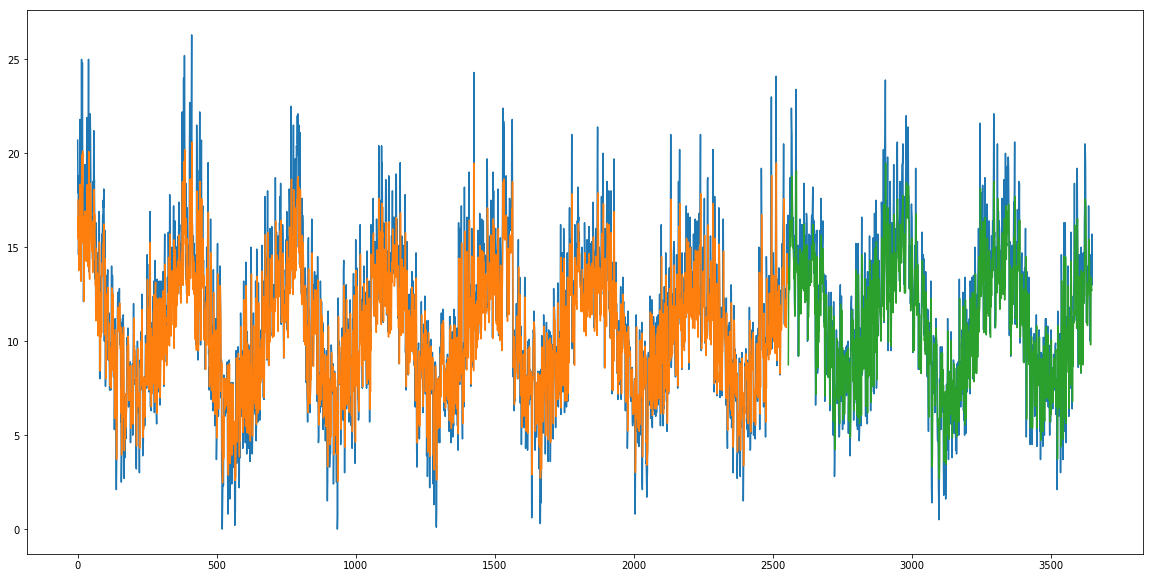

In [29]:
trainPredictPlot = np.empty_like(scaled)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(scaled)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(scaled)-1, :] = testPredict
# plot baseline and predictions
plt.figure(figsize=(20,10))
plt.plot(scaler.inverse_transform(scaled))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()